In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.datasets import make_circles , make_moons

In [4]:
import joblib

In [5]:
#x , y = make_circles(n_samples=100 ,
                     #noise = 0.1 ,
                     #factor = 0.2 ,
                     #random_state= 111)
            
X , y = make_moons(n_samples=100 ,
                     noise = 0.3,
                     random_state= 111)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                                      test_size=0.2
                                                      )

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn_parameters = {
    'n_neighbors' : [3 , 5 , 7 , 9 , 11],
    'weights' : ['uniform' , 'distance'],
    'p' : [1 , 2 , 3 , 4 , 5 , 6 ]
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
grid_search = GridSearchCV(knn , param_grid = knn_parameters , n_jobs = -1,)

In [13]:
grid_search.fit(X_train , y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'p': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [14]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [15]:
grid_search.best_score_

0.9125

In [16]:
best_knn = grid_search.best_estimator_

In [17]:
joblib.dump(best_knn , 'best_knn.pkl')

['best_knn.pkl']

In [18]:
loaded_knn = joblib.load('best_knn.pkl')

In [19]:
y_pred = loaded_knn.predict(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X , y)

DecisionTreeClassifier()

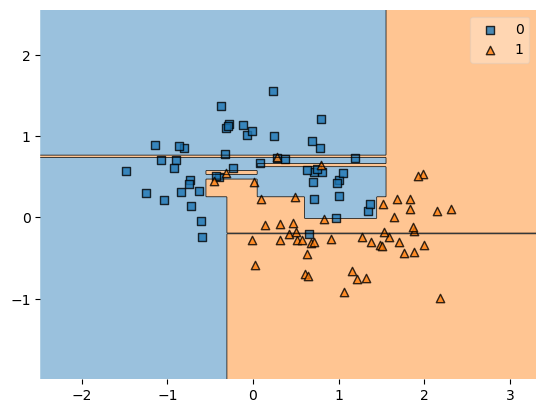

In [23]:
plot_decision_regions(X , y , dtree)
plt.show()

# Ensemble Learning

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
dtree = DecisionTreeClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
logistic = LogisticRegression()

In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
classifiers = [
    ('KNN' , knn ),
    ('Dtree' , dtree) ,
    ('NaiveBayes' ,  nb) ,
    ('Logistic' , logistic) ,
]

In [28]:
ensemble_clf = VotingClassifier(estimators = classifiers , n_jobs = -1)

In [29]:
ensemble_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('Dtree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB()),
                             ('Logistic', LogisticRegression())],
                 n_jobs=-1)

In [30]:
y_pred = ensemble_clf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [33]:
from sklearn.datasets import fetch_california_housing

In [34]:
data = fetch_california_housing()

In [35]:
col_names = data.feature_names

In [36]:
data = pd.DataFrame(data.data , columns=col_names)

In [37]:
data.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17294,9.4522,37.0,8.478723,1.175532,984.0,2.617021,34.44,-119.63
11575,3.5139,28.0,5.265351,1.103070,1155.0,2.532895,33.77,-118.00
19050,2.2244,24.0,4.491409,1.079038,917.0,3.151203,38.43,-121.83


In [38]:
x = data.data
y = data.target

AttributeError: 'DataFrame' object has no attribute 'data'

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                                       test_size= 0.2 , 
                                                       random_state = 999
                                                      )

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [41]:
 regressors = [
    ('DTree' , DecisionTreeRegressor()),
    ('KNN' ,KNeighborsRegressor(n_jobs=-1)),
    ('Support_Vector_machine' , SVR())
]

In [42]:
from sklearn.ensemble import VotingRegressor

In [43]:
ensamble_reg = VotingRegressor(regressors , n_jobs=-1 )

In [44]:
ensamble_reg.fit(X_train , y_train)

VotingRegressor(estimators=[('DTree', DecisionTreeRegressor()),
                            ('KNN', KNeighborsRegressor(n_jobs=-1)),
                            ('Support_Vector_machine', SVR())],
                n_jobs=-1)

In [45]:
y_pred = ensamble_reg.predict(X_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_pred[:5]

array([0.09056233, 1.01490703, 0.096164  , 0.48653067, 1.00798434])

In [48]:
y_test[:5]

array([0, 1, 0, 0, 1])

In [49]:
r2_score(y_test , y_pred) 

0.9412883184672746